# Data Processing and EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%pwd

'/Users/lyndon/Documents/Kaggle Project/predict-future-sales/Kaggle_predict_future_sales'

In [3]:
base= '/Users/lyndon/Documents/Kaggle Project/predict-future-sales/'

In [4]:
sales_train = pd.read_csv(base+'sales_train.csv')
item_cat = pd.read_csv(base+'item_categories.csv')
item = pd.read_csv(base+'items.csv')
shops = pd.read_csv(base+'shops.csv')

In [5]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [6]:
# column explaination
# ID - an Id that represents a (Shop, Item) tuple within the test set
# shop_id - unique identifier of a shop
# item_id - unique identifier of a product
# item_category_id - unique identifier of item category
# item_cnt_day - number of products sold. You are predicting a monthly amount of this measure
# item_price - current price of an item
# date - date in format dd/mm/yyyy
# date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33
# item_name - name of item
# shop_name - name of shop
# item_category_name - name of item category

In [7]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [8]:
print('There are %d items in total' %sales_train['item_id'].nunique())
print('There are %d shops in total' %sales_train['shop_id'].nunique())

There are 21807 items in total
There are 60 shops in total


In [9]:
item_cat.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [10]:
item.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [16]:
# add category to training set
item_map = dict(zip(item['item_id'],item['item_category_id']))
sales_train['item_category_id'] = sales_train['item_id'].map(item_map)
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
0,02.01.2013,0,59,22154,999.00,1.0,37
1,03.01.2013,0,25,2552,899.00,1.0,58
2,05.01.2013,0,25,2552,899.00,-1.0,58
3,06.01.2013,0,25,2554,1709.05,1.0,58
4,15.01.2013,0,25,2555,1099.00,1.0,56


In [17]:
print('There are %d unique item categories' % sales_train['item_category_id'].nunique())

There are 84 unique item categories


In [19]:
sample_sub = pd.read_csv(base+'sample_submission.csv')
sample_sub.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [20]:
test = pd.read_csv(base+'test.csv')
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
ID         214200 non-null int64
shop_id    214200 non-null int64
item_id    214200 non-null int64
dtypes: int64(3)
memory usage: 4.9 MB


In [22]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
0,02.01.2013,0,59,22154,999.00,1.0,37
1,03.01.2013,0,25,2552,899.00,1.0,58
2,05.01.2013,0,25,2552,899.00,-1.0,58
3,06.01.2013,0,25,2554,1709.05,1.0,58
4,15.01.2013,0,25,2555,1099.00,1.0,56


In [23]:
# create a dict: 
# key:(shop_id, item_id)
# value: ID
keys = zip(test['shop_id'],test['item_id'])
values = test['ID']
ID_dict = dict(zip(keys,values))

In [24]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
0,02.01.2013,0,59,22154,999.00,1.0,37
1,03.01.2013,0,25,2552,899.00,1.0,58
2,05.01.2013,0,25,2552,899.00,-1.0,58
3,06.01.2013,0,25,2554,1709.05,1.0,58
4,15.01.2013,0,25,2555,1099.00,1.0,56


In [25]:
# put all related columns into one dataset
sales_train['ID'] = [ID_dict.get(x,None) for x in list(zip(sales_train['shop_id'],sales_train['item_id']))]

In [26]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,ID
0,02.01.2013,0,59,22154,999.00,1.0,37,150983.0
1,03.01.2013,0,25,2552,899.00,1.0,58,NaN
2,05.01.2013,0,25,2552,899.00,-1.0,58,NaN
3,06.01.2013,0,25,2554,1709.05,1.0,58,NaN
4,15.01.2013,0,25,2555,1099.00,1.0,56,NaN


In [27]:
sales_w_ID = sales_train[~sales_train['ID'].isnull()]

In [28]:
len(sales_train)

2935849

In [29]:
len(sales_w_ID)

1224439

In [30]:
# Question1: Almost half of the training set is missing ID, which means we do not need to predict those items so we might directly throw out these points for convenience
# However, we might not throw out these items because probably there are some correlation between items so they will provide more information.

In [31]:
sales_w_ID.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1224439 entries, 0 to 2935848
Data columns (total 8 columns):
date                1224439 non-null object
date_block_num      1224439 non-null int64
shop_id             1224439 non-null int64
item_id             1224439 non-null int64
item_price          1224439 non-null float64
item_cnt_day        1224439 non-null float64
item_category_id    1224439 non-null int64
ID                  1224439 non-null float64
dtypes: float64(3), int64(4), object(1)
memory usage: 84.1+ MB


In [32]:
sales_w_ID.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,ID
0,02.01.2013,0,59,22154,999.0,1.0,37,150983.0
10,03.01.2013,0,25,2574,399.0,2.0,55,56520.0
11,05.01.2013,0,25,2574,399.0,1.0,55,56520.0
12,07.01.2013,0,25,2574,399.0,1.0,55,56520.0
13,08.01.2013,0,25,2574,399.0,2.0,55,56520.0


In [33]:
sales_w_ID.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1224439 entries, 0 to 2935848
Data columns (total 8 columns):
date                1224439 non-null object
date_block_num      1224439 non-null int64
shop_id             1224439 non-null int64
item_id             1224439 non-null int64
item_price          1224439 non-null float64
item_cnt_day        1224439 non-null float64
item_category_id    1224439 non-null int64
ID                  1224439 non-null float64
dtypes: float64(3), int64(4), object(1)
memory usage: 84.1+ MB


In [34]:
# change data type
for col in ['date_block_num', 'shop_id', 'item_id','ID']:
    sales_w_ID[col] = sales_w_ID[col].astype('int32')
sales_w_ID.info()
# sales_w_ID['date'] = 
# pd.to_datetime(sales_w_ID['date'].map(lambda x:x.replace('.', '-')))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1224439 entries, 0 to 2935848
Data columns (total 8 columns):
date                1224439 non-null object
date_block_num      1224439 non-null int32
shop_id             1224439 non-null int32
item_id             1224439 non-null int32
item_price          1224439 non-null float64
item_cnt_day        1224439 non-null float64
item_category_id    1224439 non-null int64
ID                  1224439 non-null int32
dtypes: float64(2), int32(4), int64(1), object(1)
memory usage: 65.4+ MB


In [35]:
df1 = sales_w_ID.groupby(['date_block_num','shop_id'])[['item_cnt_day']].sum()
df1.head()

item_cnt_day
date_block_num shop_id              
0              2               248.0
               3               187.0
               4               459.0
               6               867.0
               7               555.0

In [36]:
df1 = df1.unstack().fillna(0)

In [37]:
df1.head()

item_cnt_day                                                    \
shop_id                  2      3      4      5       6      7      10     12   
date_block_num                                                                  
0                     248.0  187.0  459.0    0.0   867.0  555.0  196.0  397.0   
1                     135.0  221.0  496.0  187.0  1004.0  590.0  269.0  453.0   
2                     237.0  272.0  563.0  362.0  1356.0  722.0  320.0  561.0   
3                     168.0  180.0   63.0  252.0   751.0  386.0  201.0  466.0   
4                     159.0  213.0  303.0  296.0   672.0  475.0  158.0  276.0   

                              ...                                           \
shop_id            14     15  ...     48   49      50     52     53     55   
date_block_num                ...                                            
0               438.0  636.0  ...    0.0  0.0   797.0  359.0  480.0    0.0   
1               466.0  664.0  ...    0.0  0.0   694.0  405.0  494.0    0.0   
2               565.0  814.0  ...    0.0  0.0  1071.0  570.0  783.0    0.0   
3               299.0  523.0  ...    0.0  0.0   683.0  359.0  387.0    0.0   
4               478.0  495.0  ...    0.0  0.0   773.0  368.0  576.0  292.0   

                                             
shop_id            56      57     58     59  
date_block_num                               
0               589.0     0.0    0.0  452.0  
1               528.0     0.0    0.0  472.0  
2               729.0  1429.0  840.0  583.0  
3               485.0  1102.0  601.0  408.0  
4               532.0  1106.0  463.0  429.0  

[5 rows x 42 columns]

In [34]:
df1.columns = df1.columns.droplevel(0)

In [35]:
df1.head()

shop_id,2,3,4,5,6,7,10,12,14,15,...,48,49,50,52,53,55,56,57,58,59
date_block_num,,,,,,,,,,,,,,,,,,,,,
0,248.0,187.0,459.0,0.0,867.0,555.0,196.0,397.0,438.0,636.0,...,0.0,0.0,797.0,359.0,480.0,0.0,589.0,0.0,0.0,452.0
1,135.0,221.0,496.0,187.0,1004.0,590.0,269.0,453.0,466.0,664.0,...,0.0,0.0,694.0,405.0,494.0,0.0,528.0,0.0,0.0,472.0
2,237.0,272.0,563.0,362.0,1356.0,722.0,320.0,561.0,565.0,814.0,...,0.0,0.0,1071.0,570.0,783.0,0.0,729.0,1429.0,840.0,583.0
3,168.0,180.0,63.0,252.0,751.0,386.0,201.0,466.0,299.0,523.0,...,0.0,0.0,683.0,359.0,387.0,0.0,485.0,1102.0,601.0,408.0
4,159.0,213.0,303.0,296.0,672.0,475.0,158.0,276.0,478.0,495.0,...,0.0,0.0,773.0,368.0,576.0,292.0,532.0,1106.0,463.0,429.0


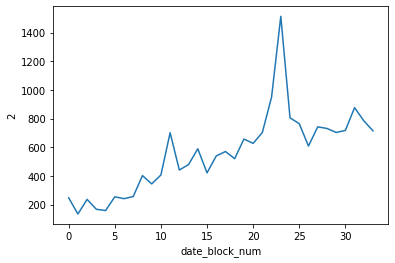

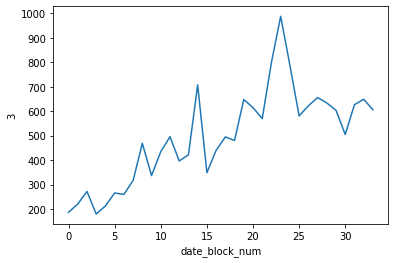

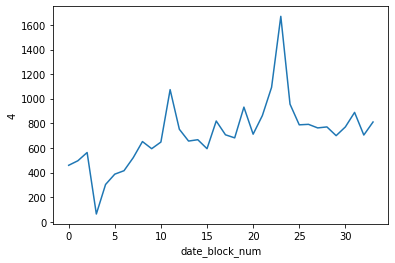

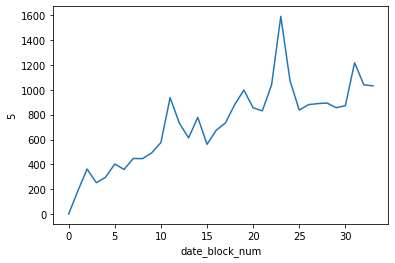

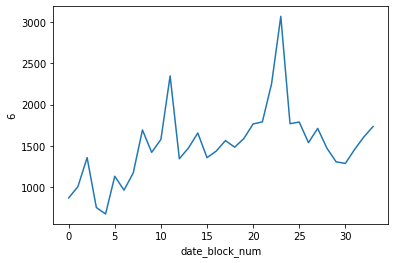

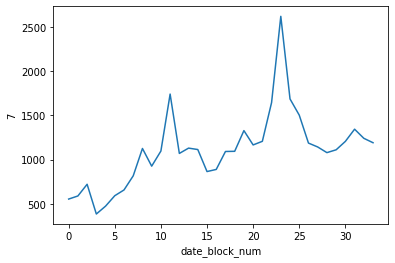

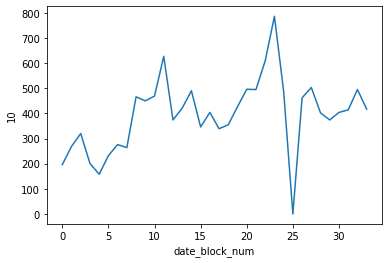

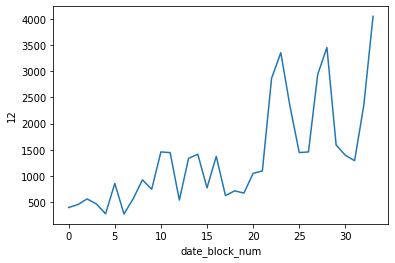

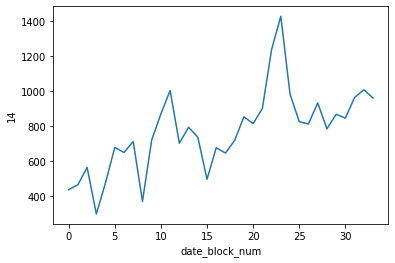

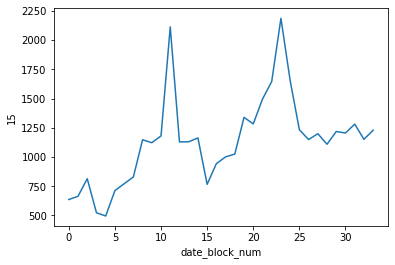

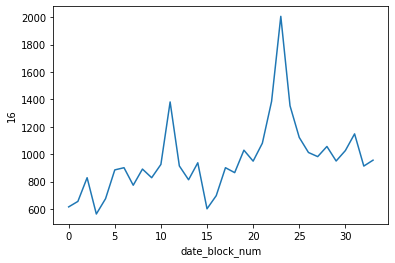

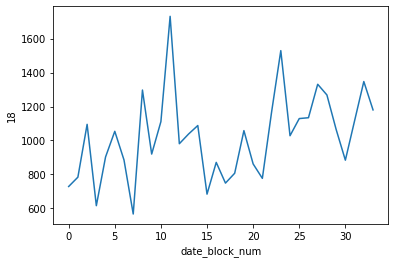

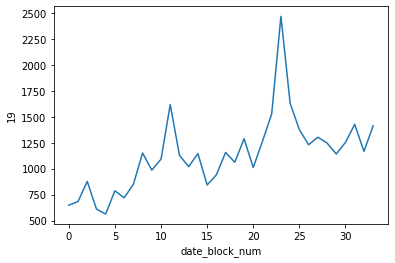

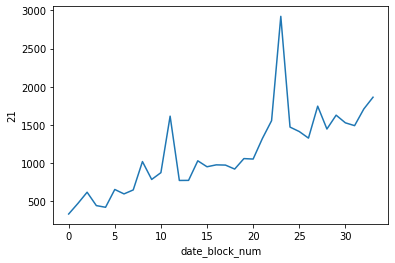

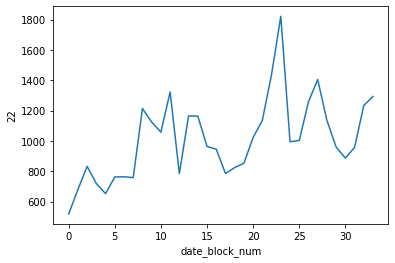

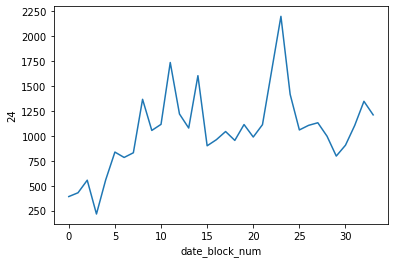

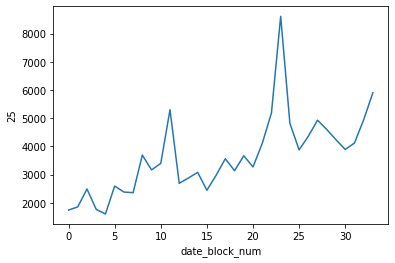

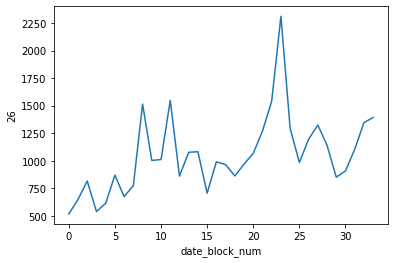

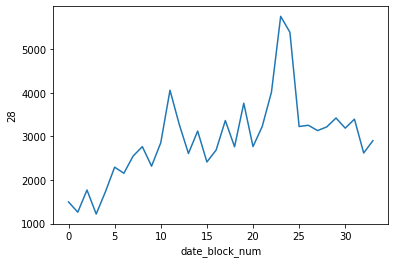

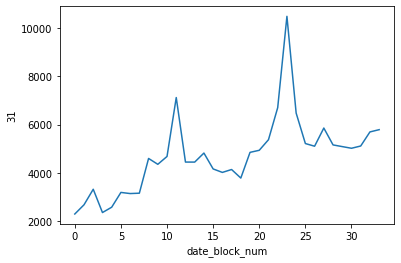

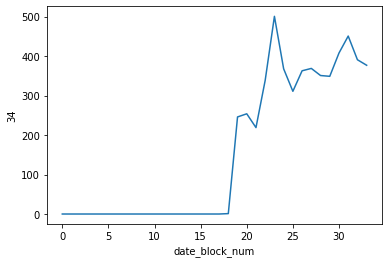

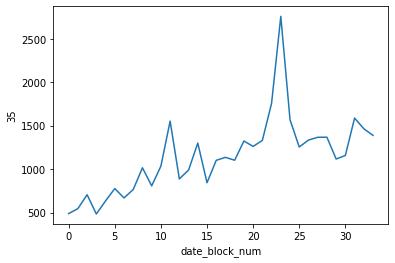

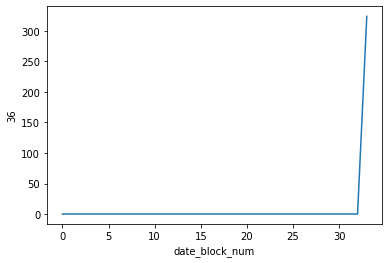

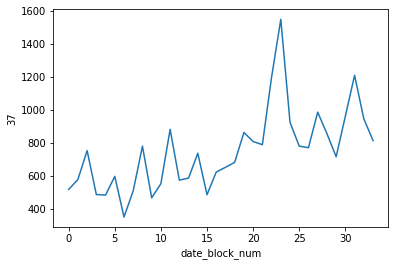

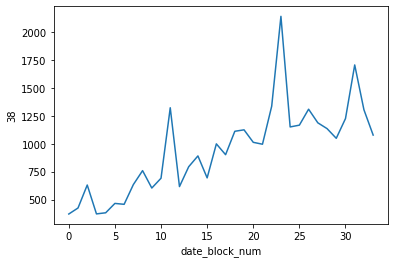

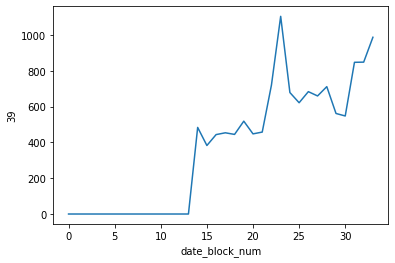

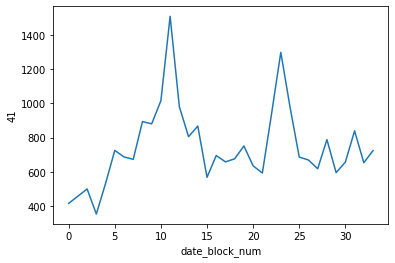

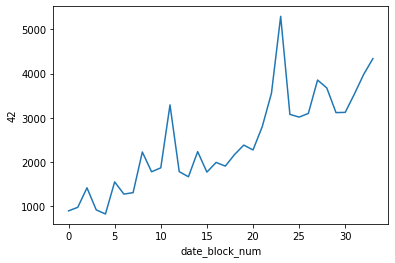

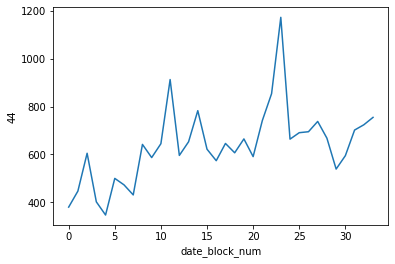

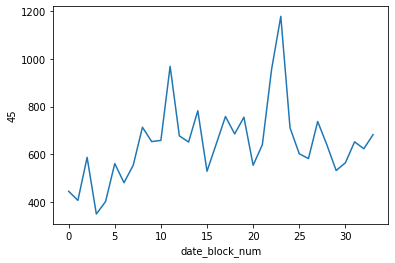

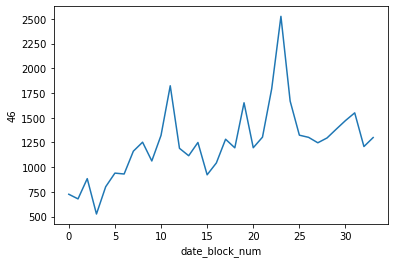

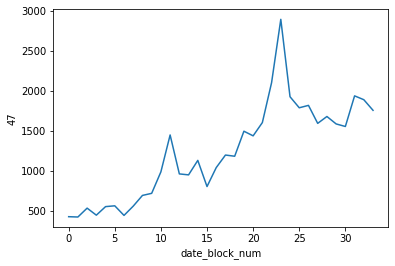

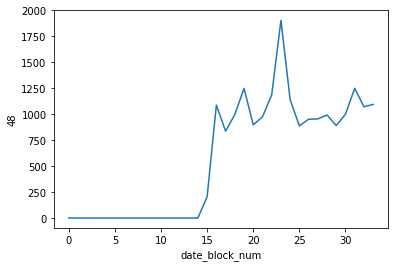

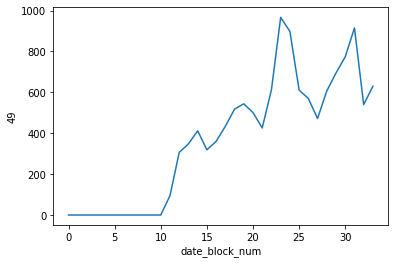

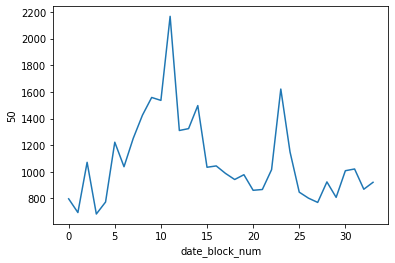

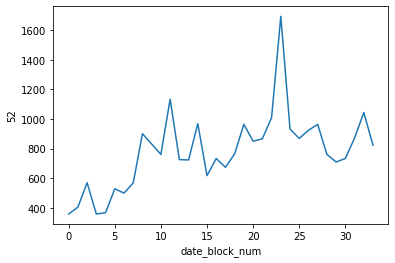

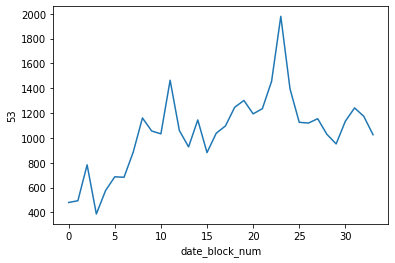

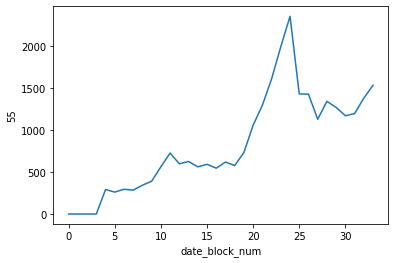

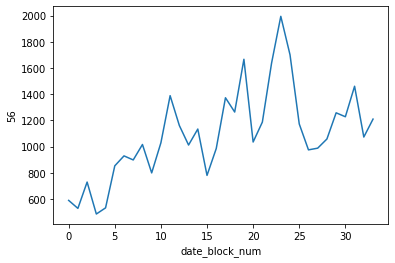

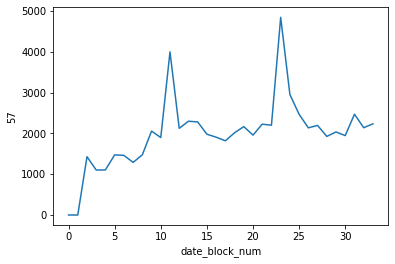

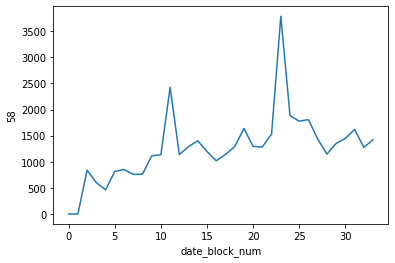

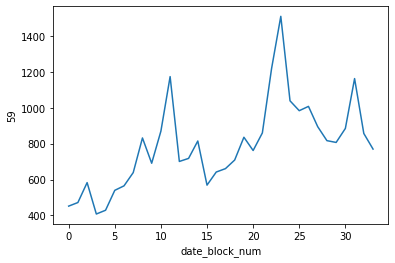

In [67]:
# plot each shop's item weekly item count
for col in df1.columns:
    sns.lineplot(x=df1.index,y=col,data=df1);
    plt.show()

In [70]:
# compute cos_similarity to see if customer's preference changed along the time
def cos_sim(vector_a, vector_b):
    """
    计算两个向量之间的余弦相似度
    :param vector_a: 向量 a 
    :param vector_b: 向量 b
    :return: sim
    """
    vector_a = np.mat(vector_a)
    vector_b = np.mat(vector_b)
    num = float(vector_a * vector_b.T)
    denom = np.linalg.norm(vector_a) * np.linalg.norm(vector_b)
    cos = num / denom
    sim = 0.5 + 0.5 * cos
    return sim

In [74]:
sim_list = [np.mean([cos_sim(df1.iloc[i,:].values, df1.iloc[i+n, :].values) for i in list(df1.index)[:-n]]) for n in range(1,len(df1))]

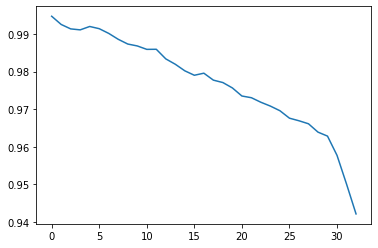

In [75]:
plt.plot(sim_list)

From the plot we could see customers' preferences towards shop did not change very much along the time

In [39]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,ID
0,02.01.2013,0,59,22154,999.00,1.0,37,150983.0
1,03.01.2013,0,25,2552,899.00,1.0,58,NaN
2,05.01.2013,0,25,2552,899.00,-1.0,58,NaN
3,06.01.2013,0,25,2554,1709.05,1.0,58,NaN
4,15.01.2013,0,25,2555,1099.00,1.0,56,NaN


In [40]:
res1 = sales_train.groupby('date_block_num').agg({'item_price':'mean'}).reset_index()
res1.head()

,date_block_num,item_price
0,0,710.622127
1,1,695.866856
2,2,694.688063
3,3,653.633797
4,4,624.179993


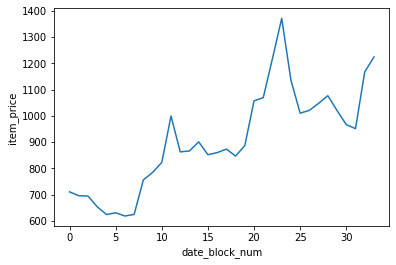

In [28]:
# price change according to time
sns.lineplot(x='date_block_num',y='item_price', data=res1);

In [41]:
# every shop's sale accoring to time
every_shop = sales_train.groupby(['date_block_num','shop_id'])['item_cnt_day'].sum().reset_index()
#every_shop['shop_id'] = every_shop['shop_id'].astype('category')
every_shop.head()

,date_block_num,shop_id,item_cnt_day
0,0,0,5578.0
1,0,1,2947.0
2,0,2,1146.0
3,0,3,767.0
4,0,4,2114.0


In [42]:
type(every_shop['shop_id'][0])

numpy.int64

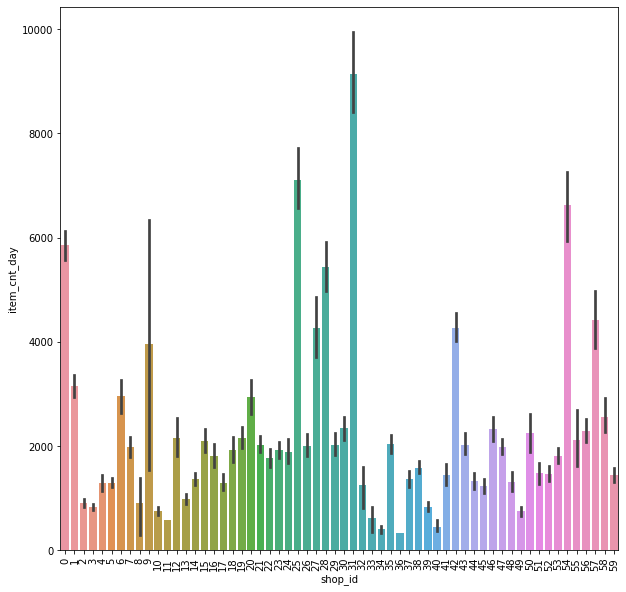

In [43]:
plt.subplots(figsize=(10,10))
sns.barplot(x='shop_id', y = 'item_cnt_day',data=every_shop);
plt.xticks(rotation=90);

In [44]:
# explore how each category's sales
every_cat = sales_train.groupby(['date_block_num','item_category_id'])['item_cnt_day'].sum().reset_index()
every_cat.head()

,date_block_num,item_category_id,item_cnt_day
0,0,0,1.0
1,0,1,1.0
2,0,2,1390.0
3,0,3,440.0
4,0,4,251.0


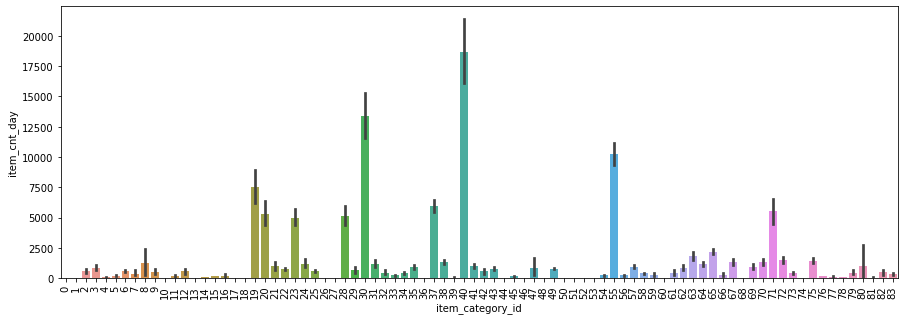

In [48]:
plt.subplots(figsize=(15,5))
sns.barplot(x='item_category_id', y = 'item_cnt_day',data=every_cat);
plt.xticks(rotation=90);

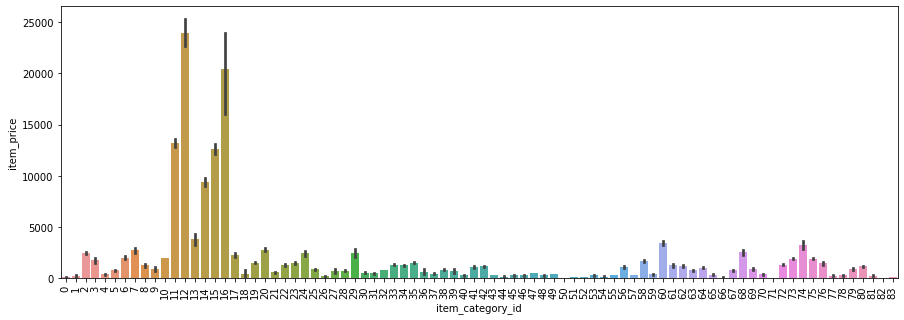

In [50]:
# explore each category's mean price
every_cat = sales_train.groupby(['date_block_num','item_category_id'])['item_price'].mean().reset_index()
every_cat.head()
plt.subplots(figsize=(15,5))
sns.barplot(x='item_category_id', y = 'item_price',data=every_cat);
plt.xticks(rotation=90);

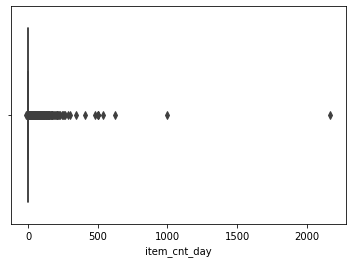

In [56]:
# see if there is any outlier
sns.boxplot(sales_w_ID['item_cnt_day']);

item sold more than 500 might be problematic, let's explore them from the higest

In [53]:
sales_w_ID[sales_w_ID['item_cnt_day']>1000]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,ID
2909818,28.10.2015,33,12,11373,0.908714,2169.0,9,37296


In [64]:
_ = sales_w_ID[sales_w_ID['ID']==37296]
_['date'] = pd.to_datetime(_['date'])
_.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,ID
58323,2013-08-01,0,12,11373,1000.0,1.0,9,37296
58324,2013-01-31,0,12,11373,97.8,5.0,9,37296
176790,2013-01-02,1,12,11373,229.0,1.0,9,37296
176791,2013-04-02,1,12,11373,130.0,1.0,9,37296
302468,2013-03-29,2,12,11373,139.5,2.0,9,37296


In [65]:
_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 464 entries, 58323 to 2909856
Data columns (total 8 columns):
date                464 non-null datetime64[ns]
date_block_num      464 non-null int32
shop_id             464 non-null int32
item_id             464 non-null int32
item_price          464 non-null float64
item_cnt_day        464 non-null float64
item_category_id    464 non-null int64
ID                  464 non-null int32
dtypes: datetime64[ns](1), float64(2), int32(4), int64(1)
memory usage: 25.4 KB


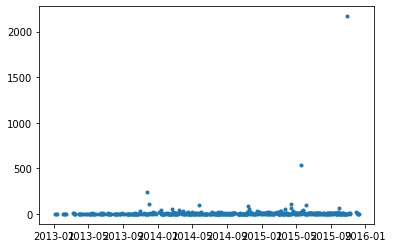

In [70]:
plt.plot(_['date'],_['item_cnt_day'],marker='.',linestyle='none')

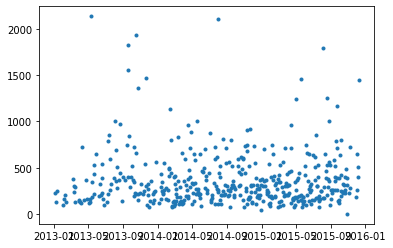

In [68]:
plt.plot(_['date'],_['item_price'],marker='.',linestyle='none')

In [72]:
item[item['item_id']==11373]

,item_name,item_id,item_category_id
11373,Доставка до пункта выдачи (Boxberry),11373,9


After seaching on google, it seems like it's a delivery service item, so this "outlier" seems to make sense to me.  But it's an outlier, I'll remove it for later use.

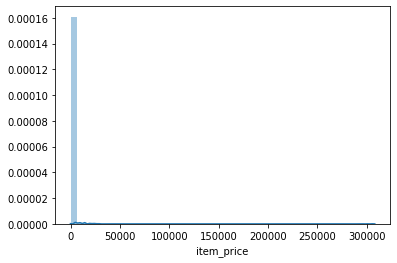

In [86]:
# see if there is any outlier
sns.distplot(sales_train['item_price']);
#plt.xlim(sales_train.item_price.min(), sales_train.item_price.max()*1.1);

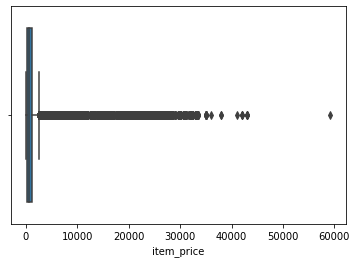

In [89]:
# see if there is any outlier
# sns.distplot(sales_w_ID['item_price']);
sns.boxplot(sales_w_ID['item_price']);

In [90]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    x = np.sort(data)
    y = np.arange(1, len(data)+1)/len(data) # make y stay in the range of (0,1)
    return x,y
def plot_ecdf(data):
    x,y = ecdf(data)
    plt.plot(x,y);

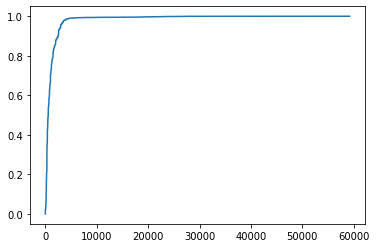

In [102]:
plot_ecdf(sales_w_ID['item_price'])

In [112]:
sales_w_ID[sales_w_ID['item_price']>40000]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,ID
885138,17.09.2013,8,12,11365,59200.0,1.0,9,37350
2885692,23.10.2015,33,42,13403,42990.0,1.0,16,107006
2893100,20.10.2015,33,38,13403,41990.0,1.0,16,183506
2910155,20.10.2015,33,12,13403,41990.0,1.0,16,40706
2910156,29.10.2015,33,12,13403,42990.0,1.0,16,40706
2913267,22.10.2015,33,18,13403,41990.0,1.0,16,91706
2917760,20.10.2015,33,3,13403,42990.0,1.0,16,20306
2927572,22.10.2015,33,28,13403,40991.0,1.0,16,45806
2931380,20.10.2015,33,22,13403,42990.0,1.0,16,66206


price higher than 100000 would be outliers

In [118]:
# remove outliers
df1 = sales_w_ID[sales_w_ID['item_cnt_day']<1001]
df1 = df1[df1['item_price']<50000]

In [36]:
# every item's sale accoring to time
every_item = sales_train.groupby(['date_block_num','item_id'])['item_cnt_day'].sum().reset_index()
#every_shop['shop_id'] = every_shop['shop_id'].astype('category')
every_item.head()

,date_block_num,item_id,item_cnt_day
0,0,19,1.0
1,0,27,7.0
2,0,28,8.0
3,0,29,4.0
4,0,32,299.0
